# Interpreting ResNet Model With GradCAM

Interpretations of the predictions are generated and visualized using Gradient CAM algorithm, specifically the `GradCAMInterpreter` class.

In [1]:
from PIL import Image
import paddle
import interpretdl as it
from interpretdl.data_processor.readers import read_image
!ln -s ../tutorials/assets assets

In [2]:
# load from paddle.vision

from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)

/Users/yuantingyi/opt/anaconda3/envs/paddle2/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Initialize the `GradCAMInterpreter`. 

In [3]:
gradcam = it.GradCAMInterpreter(paddle_model, device='gpu:0')

Before interpreting the image, we first take a look at the original image.

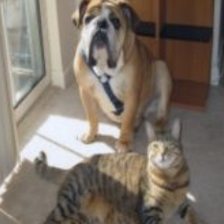

In [4]:
img_path = 'assets/catdog.png'
x = Image.fromarray(read_image(img_path)[0])
x

Then, let Gradient CAM method helps us `interpret` the image with respect to the predicted label, which is bull mastiff. We choose the last layer as the target layer.



### show feature_map name

In [5]:
layers_name = []
for n, v in paddle_model.named_sublayers():
    layers_name.append(n)
print(layers_name)

['conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer1.0', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.conv3', 'layer1.0.bn3', 'layer1.0.relu', 'layer1.0.downsample', 'layer1.0.downsample.0', 'layer1.0.downsample.1', 'layer1.1', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.conv3', 'layer1.1.bn3', 'layer1.1.relu', 'layer1.2', 'layer1.2.conv1', 'layer1.2.bn1', 'layer1.2.conv2', 'layer1.2.bn2', 'layer1.2.conv3', 'layer1.2.bn3', 'layer1.2.relu', 'layer2', 'layer2.0', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.conv3', 'layer2.0.bn3', 'layer2.0.relu', 'layer2.0.downsample', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.1', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.conv3', 'layer2.1.bn3', 'layer2.1.relu', 'layer2.2', 'layer2.2.conv1', 'layer2.2.bn1', 'layer2.2.conv2', 'layer2.2.bn2', 'layer2.2.conv3', 'layer2.2.bn3', 'layer2.2.relu', 'layer2.3', 

/Users/yuantingyi/opt/anaconda3/envs/paddle2/lib/python3.7/site-packages/paddle/fluid/dygraph/varbase_patch_methods.py:379: UserWarning: 
tensor.grad will return the tensor value of the gradient. 
  warnings.warn(warning_msg)


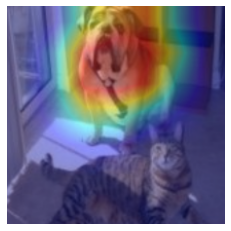

In [6]:
heatmap = gradcam.interpret(
        img_path,
        'layer4.2.conv3',
        label=None,
        visual=True,
        save_path=None)

Let's see what happens if our target label is 282 (tiger cat.)

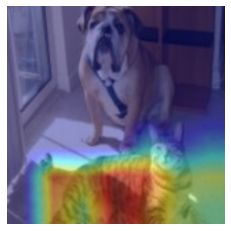

In [8]:
heatmap = gradcam.interpret(
        img_path,
        'layer4.2.conv3',
        label=282,
        visual=True,
        save_path=None)

Note that `GradCAMInterpreter` also supports multiple images as inputs. They can be either processed images or a list of image filepaths. Feel free to play around with it!